#Introduction

**Description**:
This dataset is composed of 1100 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: assuming that you want to classify this data with a
Random Forest (implemented by sklearn.ensemble.RandomForestClassifier), you
should determine whether applying PCA to this dataset is useful, and if so what
number of components you would choose to use. At the end of the analysis, you
should have chosen an optimal strategy, including the optimal set of parameters
for the classifier: write this choice explicitly in the conclusions of your
notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

# Libraries

Import useful libraries

In [ ]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.stats import randint
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
import seaborn as sns
import numpy as np

%matplotlib inline     
sns.set(color_codes=True)

#Loading the data

We start off by loading and taking a first look at our dataset.

In [ ]:
# Load the dataset
df = pd.read_csv('mldata_0003167526.csv', engine='python', index_col=0)

# Display the first few rows of the dataset
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,4.057270,1.951432,-2.014668,-0.642949,0.650687,-3.166441,0.675066,-0.024935,-0.244799,...,0.879803,-0.144238,1.975087,-3.180973,0.502609,1.551031,-3.166441,-0.747862,1.554594,0.736315
1,0,3.867975,1.428813,1.978360,-0.111222,2.052394,0.395007,0.824279,-0.274835,0.356668,...,2.253963,-0.441242,0.884054,-2.120698,0.767681,1.990281,0.395007,0.708836,0.957221,-1.270081
2,1,2.980818,0.261838,-3.313828,-6.191561,1.140616,0.943470,-0.797617,-0.565640,0.380764,...,1.010830,1.501111,0.457695,-0.845371,-0.074576,1.825136,0.943470,-0.373409,1.732898,-1.616465
3,1,-15.612333,-0.178304,-4.713225,1.012077,-0.728142,-0.350978,1.997204,-0.221699,0.899836,...,-0.191173,-3.649844,-0.232722,-1.653924,-0.053498,2.999686,-0.350978,-0.350323,-4.144130,1.291735
4,1,0.987185,-0.475980,-4.189851,-3.362096,1.594640,-5.039295,-0.645427,0.101655,0.464569,...,0.116223,-1.668353,-0.080317,1.841277,1.362457,0.438424,-5.039295,-0.225977,0.985768,-2.583778


In [ ]:
# Describe the dataframe
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.499091,-0.672008,0.091041,-0.537824,-0.278470,0.109553,0.541802,0.090083,0.099735,0.087648,...,0.099789,0.570143,0.136376,-0.414618,0.064678,0.610409,0.541802,0.125500,0.533639,0.158889
std,0.500227,4.481494,1.011377,2.209936,2.109117,1.005550,2.441415,0.990888,1.023479,0.987395,...,1.024063,2.345155,0.999228,2.267628,0.994216,2.194797,2.441415,0.997895,2.203774,2.094577
min,0.000000,-15.655886,-2.733398,-6.897339,-9.068785,-2.717827,-7.064519,-2.939766,-2.834590,-3.008175,...,-3.262510,-6.296130,-3.066167,-9.140800,-3.135697,-5.847707,-7.064519,-3.205089,-6.372749,-7.240100
25%,0.000000,-3.472009,-0.570993,-1.941254,-1.666970,-0.576431,-1.022132,-0.587099,-0.597444,-0.620232,...,-0.590890,-1.086519,-0.550595,-2.025955,-0.546712,-0.807645,-1.022132,-0.504176,-0.899168,-1.195587
50%,0.000000,-0.708800,0.069533,-0.573898,-0.447134,0.116504,0.649191,0.111437,0.092746,0.080980,...,0.066514,0.566573,0.120195,-0.457113,0.030411,0.586553,0.649191,0.103476,0.592584,0.151943
75%,1.000000,2.326327,0.719795,0.959192,1.015581,0.802281,2.173787,0.742773,0.774012,0.759486,...,0.813773,2.240195,0.840255,1.039940,0.780491,1.901821,2.173787,0.820564,1.980756,1.615480
max,1.000000,13.270171,3.389469,6.370923,7.501342,3.125541,7.275244,3.289488,3.169168,2.994109,...,3.340135,8.357498,3.646904,6.713087,3.131615,8.269118,7.275244,3.621707,8.333575,6.386495


In [ ]:
# Check content and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1100 non-null   int64  
 1   feature_1   1100 non-null   float64
 2   feature_2   1100 non-null   float64
 3   feature_3   1100 non-null   float64
 4   feature_4   1100 non-null   float64
 5   feature_5   1100 non-null   float64
 6   feature_6   1100 non-null   float64
 7   feature_7   1100 non-null   float64
 8   feature_8   1100 non-null   float64
 9   feature_9   1100 non-null   float64
 10  feature_10  1100 non-null   float64
 11  feature_11  1100 non-null   float64
 12  feature_12  1100 non-null   float64
 13  feature_13  1100 non-null   float64
 14  feature_14  1100 non-null   float64
 15  feature_15  1100 non-null   float64
 16  feature_16  1100 non-null   float64
 17  feature_17  1100 non-null   float64
 18  feature_18  1100 non-null   float64
 19  feature_19  1100 non-null  

We now check whether there are any missing values. Luckily, we see there are none.

In [ ]:
# Check if there are any missing values
df.isnull().any().any()

False

In summary, we have a dataset of 1100 rows and 31 columns, the first of which is the label column. All entries of the dataset are floats, except for the labels that only take values "0" or "1". We do not have any null entries, and most of the features appear with mean 0. 

#Separating the data

Before proceeding on our inquiry, we must split the data into features (X) and labels (y).

In [ ]:
# Separate features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,4.057270,1.951432,-2.014668,-0.642949,0.650687,-3.166441,0.675066,-0.024935,-0.244799,1.099651,...,0.879803,-0.144238,1.975087,-3.180973,0.502609,1.551031,-3.166441,-0.747862,1.554594,0.736315
1,3.867975,1.428813,1.978360,-0.111222,2.052394,0.395007,0.824279,-0.274835,0.356668,-0.214423,...,2.253963,-0.441242,0.884054,-2.120698,0.767681,1.990281,0.395007,0.708836,0.957221,-1.270081
2,2.980818,0.261838,-3.313828,-6.191561,1.140616,0.943470,-0.797617,-0.565640,0.380764,1.595929,...,1.010830,1.501111,0.457695,-0.845371,-0.074576,1.825136,0.943470,-0.373409,1.732898,-1.616465
3,-15.612333,-0.178304,-4.713225,1.012077,-0.728142,-0.350978,1.997204,-0.221699,0.899836,1.032810,...,-0.191173,-3.649844,-0.232722,-1.653924,-0.053498,2.999686,-0.350978,-0.350323,-4.144130,1.291735
4,0.987185,-0.475980,-4.189851,-3.362096,1.594640,-5.039295,-0.645427,0.101655,0.464569,1.007361,...,0.116223,-1.668353,-0.080317,1.841277,1.362457,0.438424,-5.039295,-0.225977,0.985768,-2.583778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.486212,-0.755237,1.496743,-0.966680,-0.604068,1.385061,-1.097147,-0.480347,0.247602,0.164477,...,-0.244126,-0.926585,0.883256,-1.476773,-0.319275,0.976549,1.385061,1.045007,0.492219,1.704167
1096,-0.162522,0.766001,-2.277737,3.072013,0.743206,-0.273250,-0.132270,-0.186075,-0.030593,0.631806,...,-0.457899,1.125114,1.055859,0.493116,0.098920,-1.877514,-0.273250,-0.923706,-0.437961,-0.530500
1097,-12.316811,-0.913487,-2.676490,-1.717323,0.428345,0.905332,1.127144,-0.765455,-0.061206,-2.943096,...,0.516651,-0.499196,-0.882315,2.148700,-0.001280,-1.127778,0.905332,-1.627599,-4.502604,0.401528
1098,-7.206946,-0.479993,-2.920069,-2.568712,0.039729,0.307855,2.759019,2.148201,2.335403,-0.197616,...,0.184319,4.321605,-0.879819,-1.527462,1.695145,3.285086,0.307855,-0.299364,-0.283931,-2.531881


In [ ]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1095    0
1096    1
1097    1
1098    1
1099    1
Name: label, Length: 1100, dtype: int64

# Data exploration

We start our EDA by checking the proportions of the labels in our dataframe. Indeed, unbalanced label partition (i.e., one class is represented significantly more than the other), may negatively affect the model's performance, making it biased towards the largest class.

In [ ]:
df['label'].value_counts(normalize=True)

0    0.500909
1    0.499091
Name: label, dtype: float64

We see that  labels "1" and "0" have an approximately equal frequency. This helps us during the analysis because it allows us to skip steps of data balancing.

Now, we can take a look at the distributions of our features.

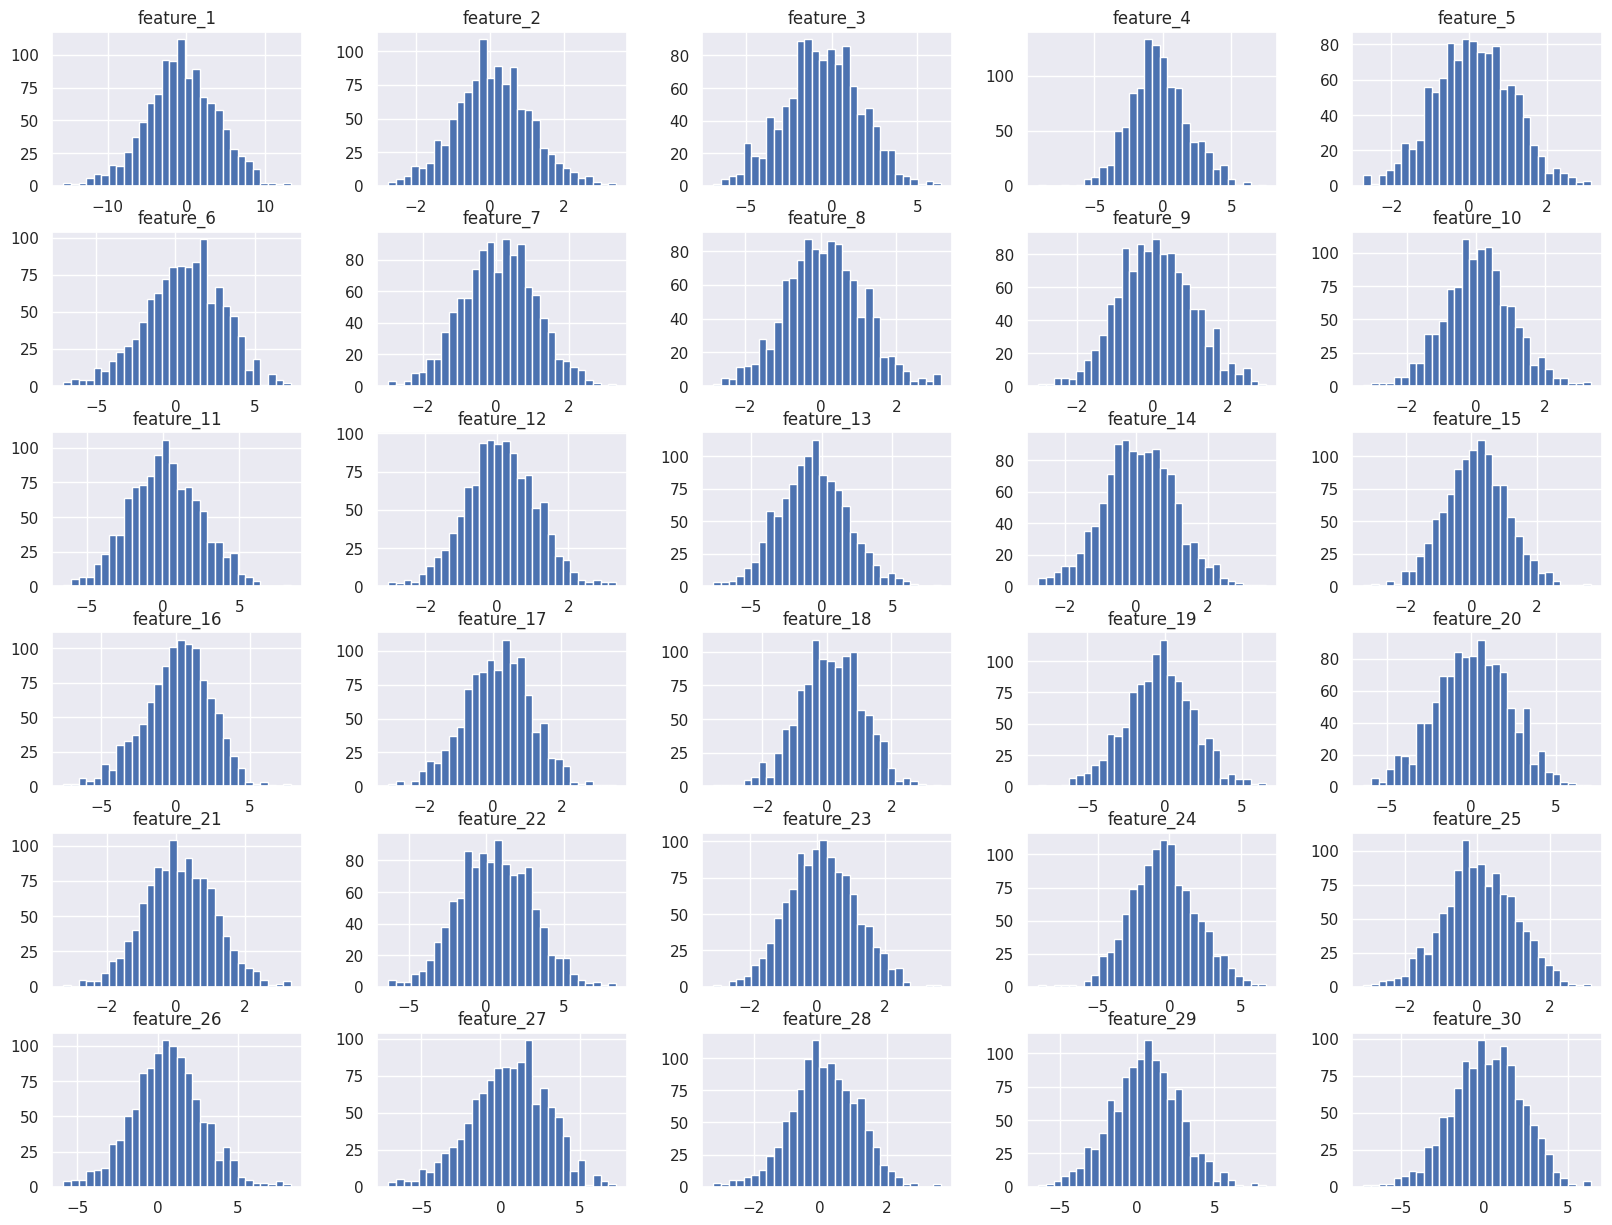

In [ ]:
X.hist(bins=30, figsize=(20,15))
plt.show()

Our features seem to follow a normal distribution with mean approximately 0. We check this last statement in a more rigorous way.

In [ ]:
# Get the mean of each feature 
feature_means = X.mean()
print(feature_means)

feature_1    -0.672008
feature_2     0.091041
feature_3    -0.537824
feature_4    -0.278470
feature_5     0.109553
feature_6     0.541802
feature_7     0.090083
feature_8     0.099735
feature_9     0.087648
feature_10    0.076066
feature_11    0.115036
feature_12    0.109672
feature_13   -0.601236
feature_14    0.070106
feature_15    0.130011
feature_16    0.112100
feature_17    0.135944
feature_18    0.114952
feature_19   -0.339674
feature_20    0.082764
feature_21    0.099789
feature_22    0.570143
feature_23    0.136376
feature_24   -0.414618
feature_25    0.064678
feature_26    0.610409
feature_27    0.541802
feature_28    0.125500
feature_29    0.533639
feature_30    0.158889
dtype: float64


In [ ]:
# Flatten the DataFrame to a single series and compute the mean
overall_mean = X.values.flatten().mean()
print(overall_mean)

0.06546349266092971


When looking at the features' distributions, we see that some of them vary in different ranges. For this reason, in order for our model to interpret these features on the same scale, we might want to perform feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = sklearn.preprocessing.StandardScaler().fit(X)

In [ ]:
X_scal= pd.DataFrame(scaler.transform(X), columns = X.columns)

We split our data into training data and validation data. This will be useful to train and test the models we will build in a succeeding section of the notebook.

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y, test_size=0.25, random_state=42)


Let's now see how our previous graphs changed.

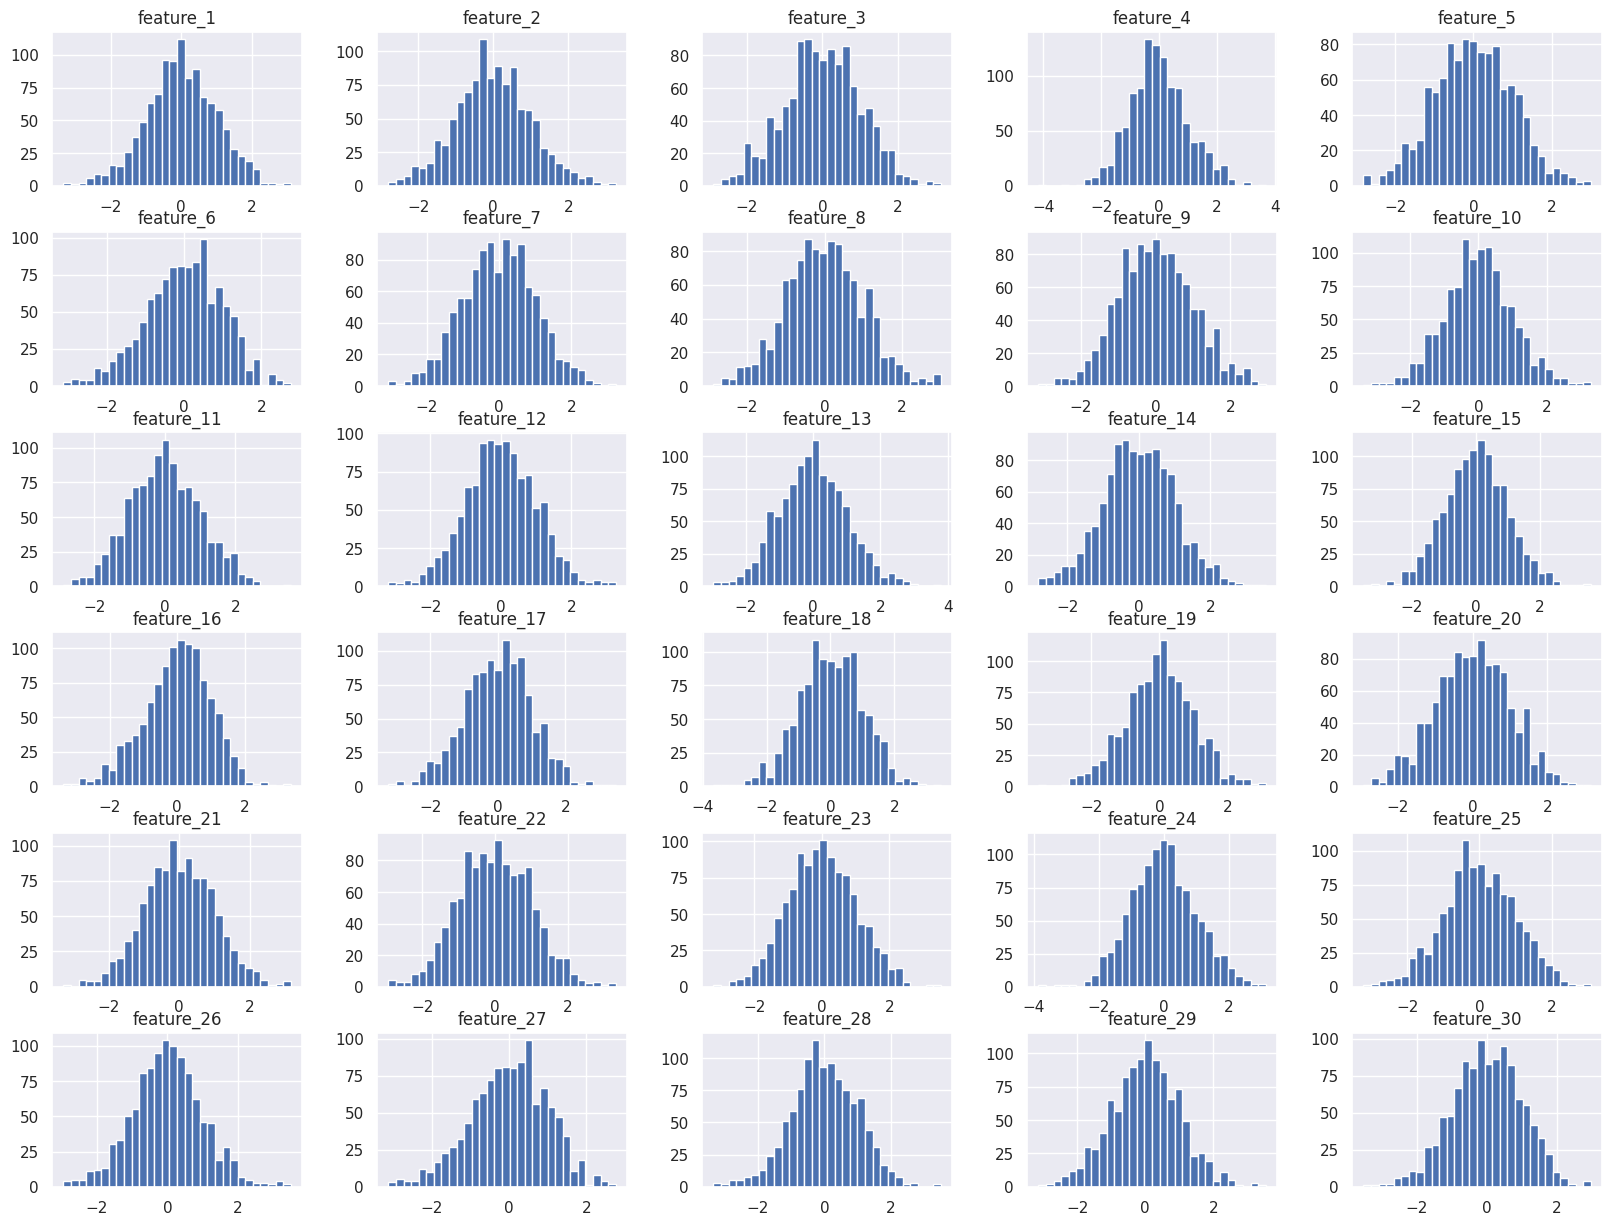

In [ ]:
# Plot histograms
X_scal.hist(bins=30, figsize=(20,15))
plt.show()

It is clear that the ranges of the features' distributions are now pretty much constant. 

Let us compare on the same graph the distributions of the features after scaling, to see whether we must also carry out a step of normalization.

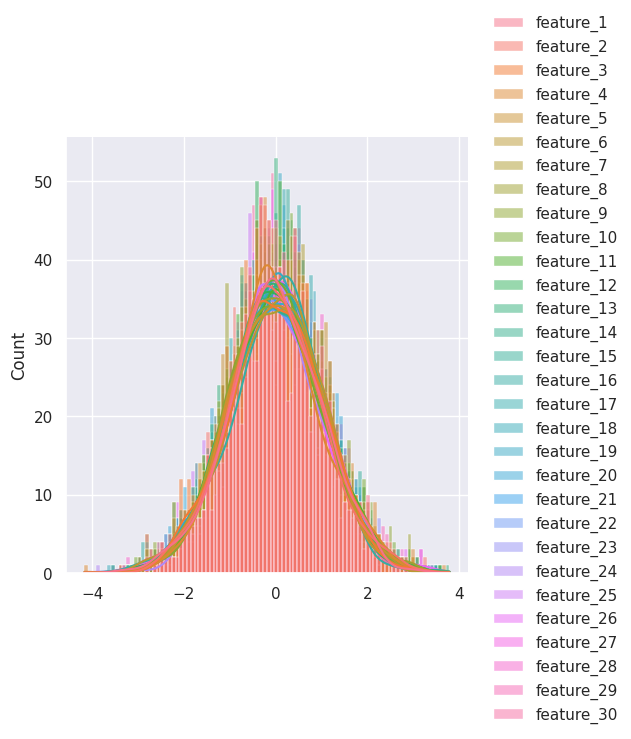

In [ ]:
sns.displot(X_scal.iloc[:,:30], kde=True)

Since the rescaled features' distributions seem to follow similar normal distributions with mean 0, we're happy of our scaling, and skip normalization.

## Correlation

A strategy used to check whether PCA can be useful to our analysis is by checking the correlation matrix of our data. Indeed, if we witness high correlations between features, we might want to intervene applying a principal component analysis.

In [ ]:
correlation = X_train.corr()

<Axes: >

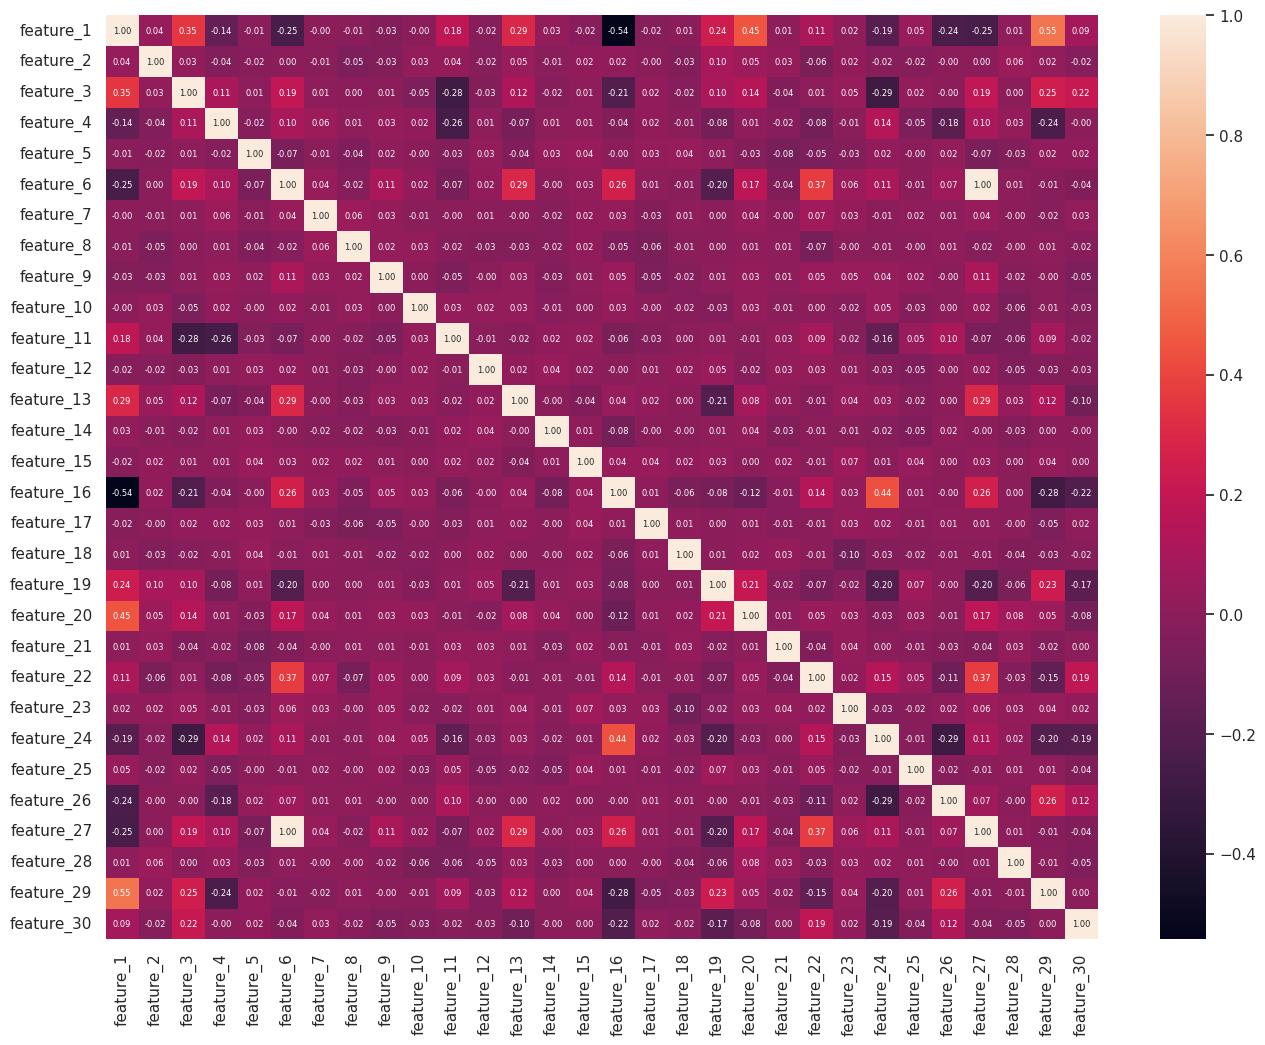

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', annot_kws={'size': 6})

A very small portion of features are highly correlated. In particular, feature 6 and feature 27 appear to have correlation 1. This means that they are perfectly dependent one on the other. Therefore, it would be sensible to filter out one of the two features, since it adds no value to the inquiry. We will to this in the following section.

Most features have an extremely low correlation. Therefore, we do not have any strong evidence supporting the application of PCA during our analysis.

To better understand the amount of features that have significant correlation, we represent the previous graph once again, but only containing those cells that show a correlation above 0.3.

<Axes: >

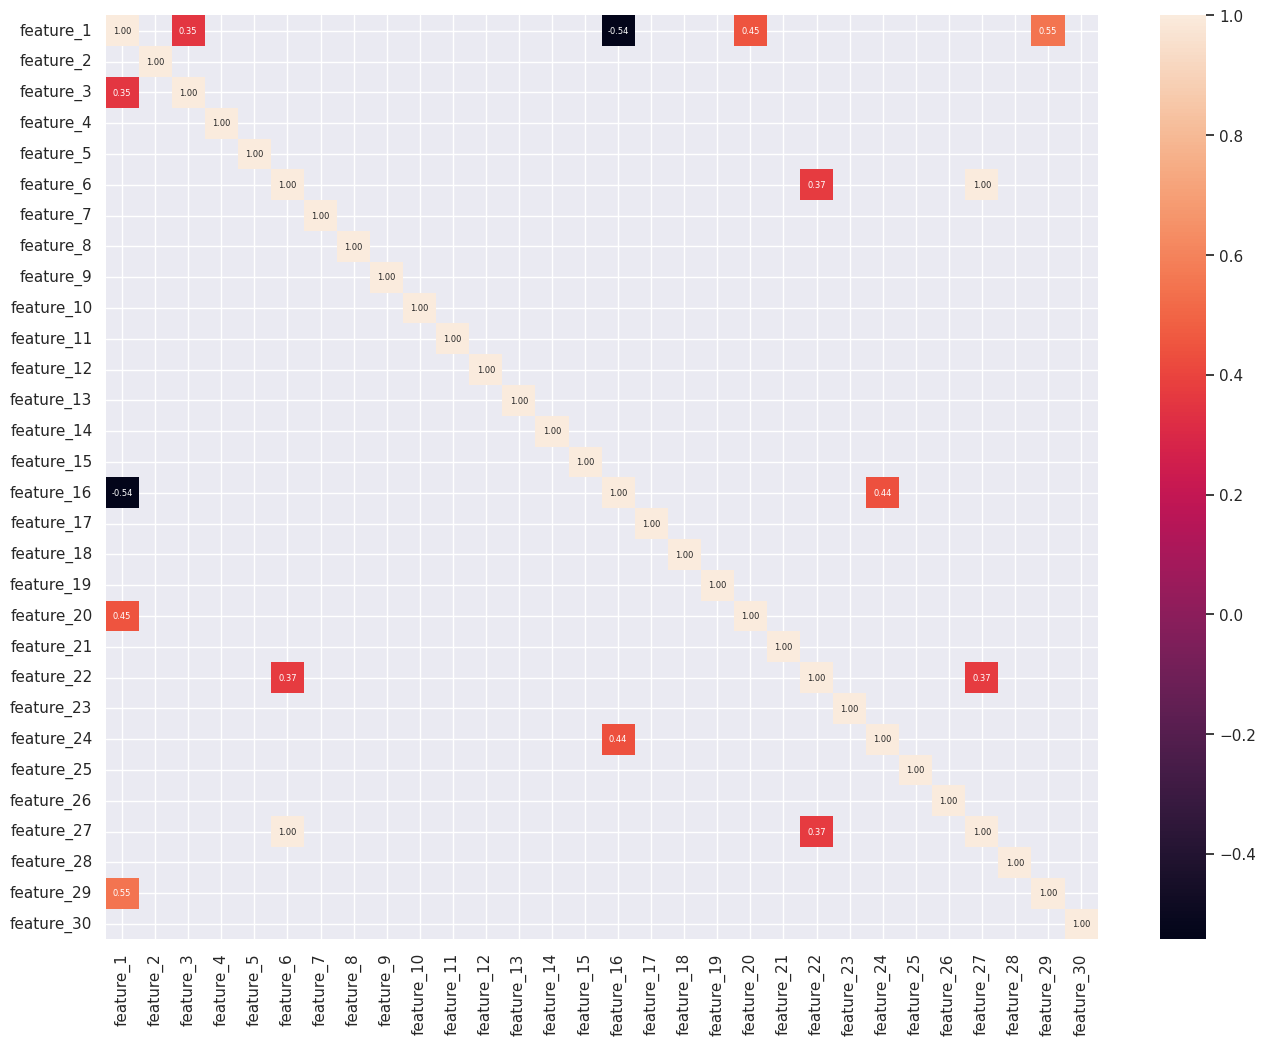

In [ ]:
mask = np.abs(correlation) < 0.30
filtered_corr = correlation.mask(mask)

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', annot_kws={'size': 6})

Hence, only 8 pairs of features are correlated with a correlation above 0.3. We will later check whether applying PCA to delete such correlations improves the performance of our model.

### Filter out correlated feature

As mentioned, feature 27 and feature 6 are basically equivalent, since they have correlation 1. We therefore aim to filter out one of the two columns (let us choose feature 27).

In [ ]:
X = X.drop("feature_27", axis=1)
X_scal = X_scal.drop("feature_27", axis=1)

We must also redefine the split data sets

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y, test_size=0.25, random_state=42)

## Preliminary checks on PCA

We want to further observe whether we can determine if PCA might turn useful to our inquiry beforehand. 

One of the most popular ways to visually find the optimal number of components to consider during the analysis, is by looking at how explained variance evolves with more PCA components.

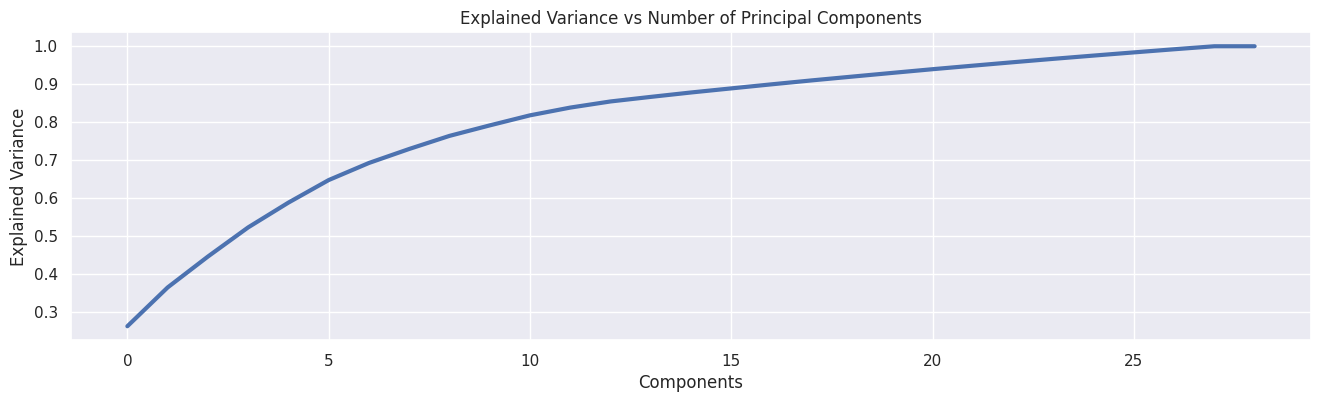

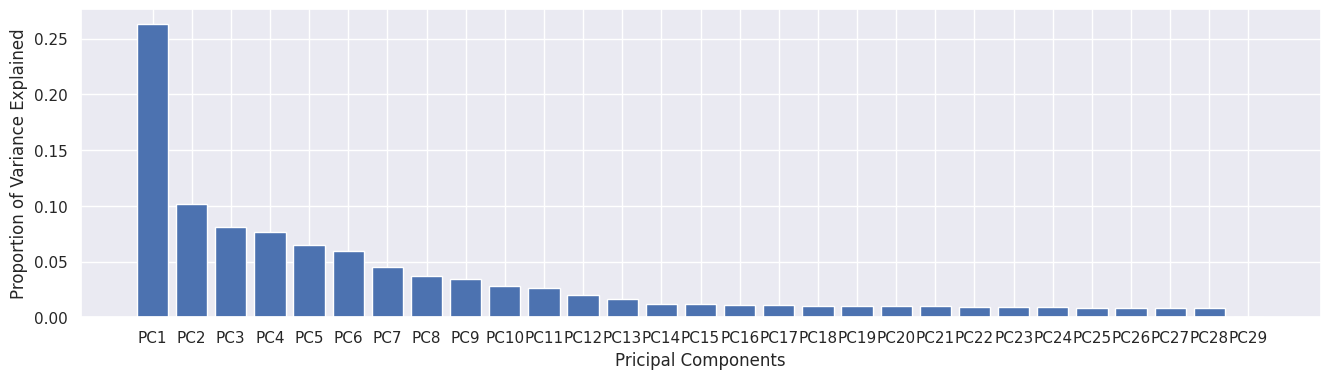

In [ ]:
pca = PCA(n_components=29)
fitted = pca.fit_transform(X_train)
components = pca.components_
cumsum_pca = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(16, 4))
plt.plot(cumsum_pca, linewidth=3)
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs Number of Principal Components")
plt.grid(True)
plt.show()
    
var = pca.explained_variance_ratio_[0:29]
labels = ["PC"+str(i+1) for i in range(29)]
plt.figure(figsize=(16,4))
plt.bar(labels, var)
plt.xlabel('Pricipal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Once again, there is no strong evidence in favour of applying PCA. Indeed, the 'Explained Variance vs Number of principal Components' plot does not show any clear elbow. Moreover, most components explain a reasonable proportion of variance. However, we still see that a very small number of components explain a minimal proportion of variance: this is something we might want to work on by using PCA.

Suppose for example, we wanted to reduce correlations, but not drop any of the columns or information that they contain. Let us do this by setting a threshold of 95% variance and use PCA. Hence, we can find a value for the number of components we want to use.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print('Number features: {}\tTotal Variance Explained: {}'.format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 25	Total Variance Explained: 0.9590994466683971


25 features out of 29 are able to explain 95% of the variance. This is a significantly large proportion of features, that once again makes us doubt the necessity to apply PCA. 

We now keep the first two principal components of our data and visually observe whether we can infer any separation between the two label classes.

In [ ]:
# Create lists of indices of the data with labels 0 and 1 respectively
l0 = df[df['label'] == 0].index
l1 = df[df['label'] == 1].index

In [ ]:
# Apply PCA
pca2D = PCA(n_components=2)
data_2D = pca2D.fit_transform(X_scal)

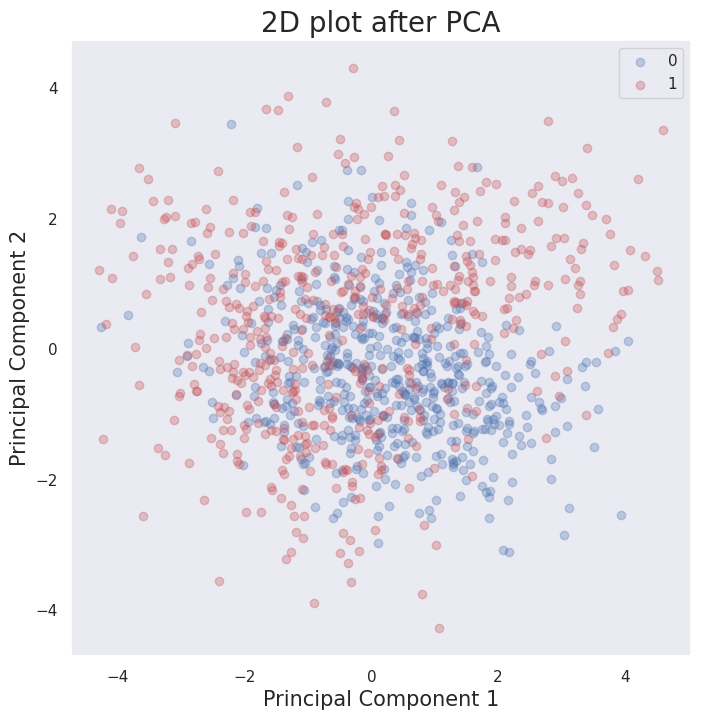

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D plot after PCA', fontsize = 20)

# Specify the labels for the classes
classes = [0, 1]
colors = ['b', 'r']

# Plot each class separately
for label, color in zip(classes, colors):
    indices_to_keep = df['label'] == label
    ax.scatter(data_2D[indices_to_keep, 0], 
               data_2D[indices_to_keep, 1],
               c = color, 
               alpha = 0.3)
    
ax.legend(classes)
ax.grid()
plt.show()

This 2D plot isn't able to depict a clear distinction between the two classes of data. Let us try with a 3D representation instead.

In [ ]:
# Apply PCA
pca3D = PCA(n_components = 3)
data_3D = pca3D.fit_transform(X_scal)

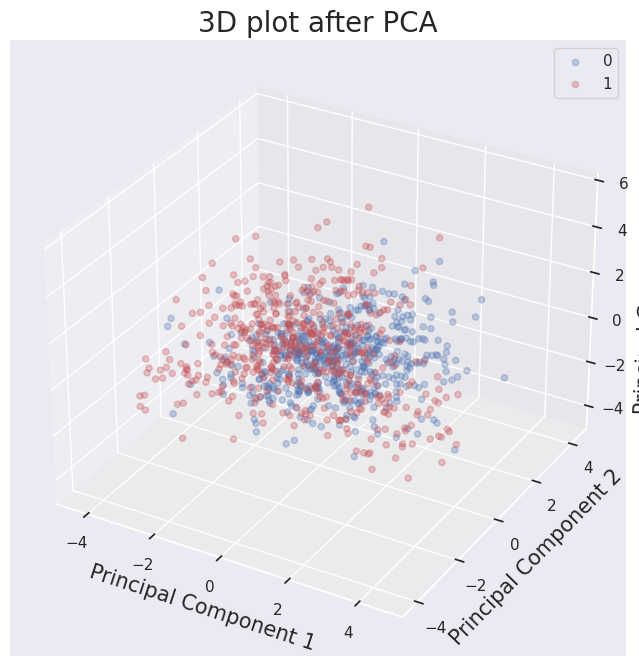

In [ ]:
# Plotting
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3D plot after PCA', fontsize = 20)

# Specify the labels for the classes
classes = [0, 1]
colors = ['b', 'r']

# Plot each class separately
for label, color in zip(classes, colors):
    indices_to_keep = df['label'] == label
    ax.scatter(data_3D[indices_to_keep, 0], 
               data_3D[indices_to_keep, 1],
               data_3D[indices_to_keep, 2],
               c = color, 
               alpha = 0.3)
    
ax.legend(classes)
plt.show()

Once again, we can gain little insight from the graphical representation of our data. 

After failing in drawing conclusions from the graphical representation of our data following PCA, we try applying t-SNE. 

### t-SNE

t-SNE, short for t-Distributed Stochastic Neighbor Embedding, is a popular dimensionality reduction technique widely used in data visualization and exploratory data analysis. It is particularly effective for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D, while preserving the local structure and relationships between data points.

In [ ]:
from sklearn.manifold import TSNE

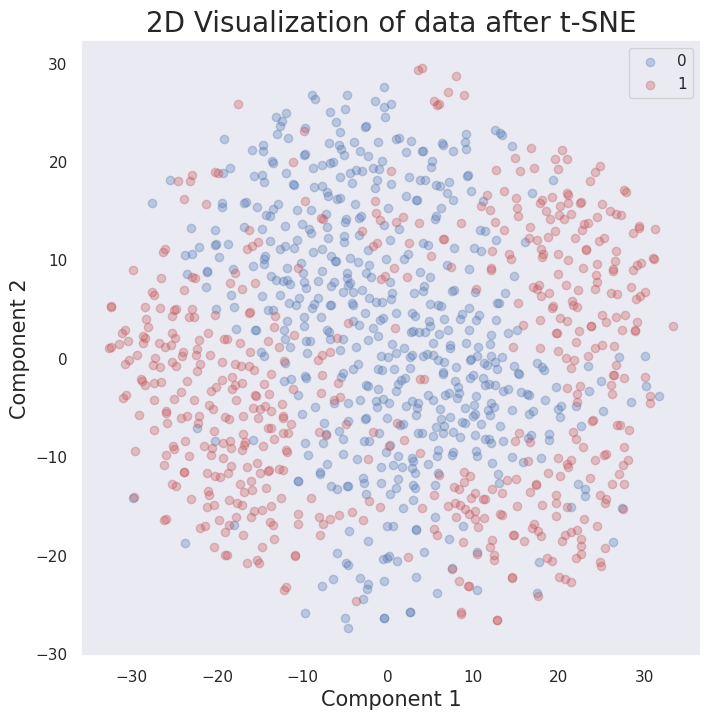

In [ ]:
# Fit and transform with t-SNE
model = TSNE(n_components=2, random_state=42)
embedded = model.fit_transform(X_scal)

# Prepare the data for visualization
df_tsne = pd.DataFrame(data = embedded, columns = ['Component 1', 'Component 2'])
df_tsne = pd.concat([df_tsne, df[['label']]], axis = 1)

# Visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2D Visualization of data after t-SNE', fontsize = 20)

classes = [0, 1]
colors = ['b', 'r']
for label, color in zip(classes,colors):
    indicesToKeep = df_tsne['label'] == label
    ax.scatter(df_tsne.loc[indicesToKeep, 'Component 1'], 
               df_tsne.loc[indicesToKeep, 'Component 2'], 
               c = color,
               alpha = 0.3)
ax.legend(classes)
ax.grid()

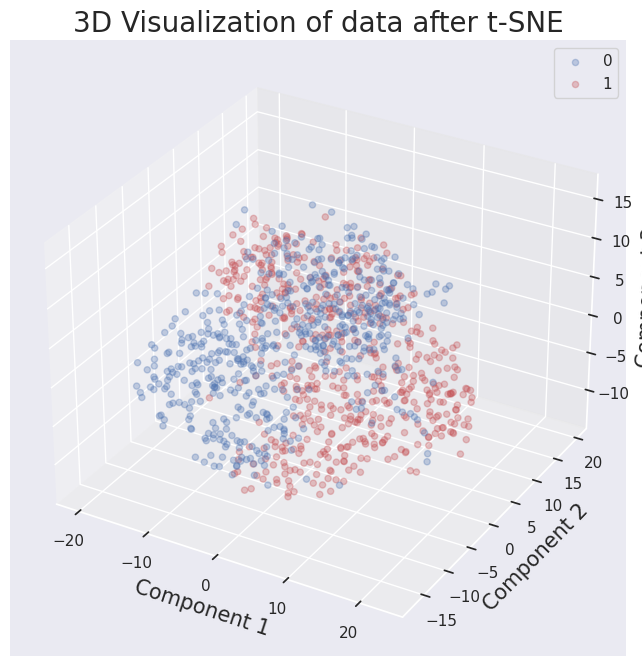

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Fit and transform with t-SNE
model = TSNE(n_components=3, random_state=42)
embedded = model.fit_transform(X)

# Prepare the data for visualization
df_tsne = pd.DataFrame(data = embedded, columns = ['Component 1', 'Component 2','Component 3'])
df_tsne = pd.concat([df_tsne, df[['label']]], axis = 1)

# Visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3D Visualization of data after t-SNE', fontsize = 20)

classes = [0, 1]
colors = ['b', 'r']
for label, color in zip(classes,colors):
    indicesToKeep = df_tsne['label'] == label
    ax.scatter(df_tsne.loc[indicesToKeep, 'Component 1'], 
               df_tsne.loc[indicesToKeep, 'Component 2'],
               df_tsne.loc[indicesToKeep, 'Component 3'],
               c = color,
               alpha = 0.3)
ax.legend(classes)
plt.show()


This dimensionality reduction technique seems to give a slightly better visualization compared to the one generated by PCA. However, it is still not enough for us to draw significant conclusions on the trends of the data.

## Data clustering

We conclude our data exploration by applying clustering techniques that allow us to check if we can find any natural separation between classes of the dataset.

### K-means

K-means is a popular unsupervised machine learning algorithm that groups data into K distinct clusters based on the data attributes. We try applying a 2-means algorithm on the dataset and see if the clustering generated is somehow linked to the labelling of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


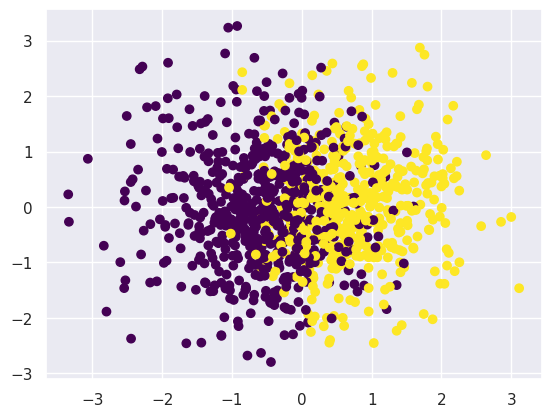

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scal)
plt.scatter(X_scal.iloc[:,0], X_scal.iloc[:,1], c=kmeans.labels_, cmap='viridis')
plt.show()

We want to compare the K-means clustering results with the provided labels and compute some metrics to evaluate their affinity. Indeed, ideally we separated as accurately as possible data with label 0 from data with label 1 with the application of the 2-means clustering method.

In [ ]:
df['cluster'] = kmeans.labels_

# We generate the confusion matrix for the predicted and true labels
cm = confusion_matrix(df['cluster'],y)

# The linear_sum_assignment function can be used to permute the labels
rows, cols = linear_sum_assignment(cm, maximize=True)
predicted_labels = cols[y]

# Now, we can compute the metrics
print('Confusion matrix:', cm)
print('Accuracy:', accuracy_score(df['cluster'],y))
print('Precision:', precision_score(df['cluster'],y))

Confusion matrix: [[256 339]
 [295 210]]
Accuracy: 0.42363636363636364
Precision: 0.3825136612021858


Unfortunately, the clustering didn't seem to find any useful grouping of the data that could be related to the data points' classes of belonging.

### Spectral clustering

Spectral Clustering takes a similarity matrix between the data points and creates a low-dimensional embedding from it, then extracts clusters similarly to k-means. Some of the advantages of Spectral Clustering are that it doesn't make any assumptions on the form or size of the clusters, unlike K-means which assumes spherical clusters. Also, it can identify clusters in any arbitrary shape which is a beneficial feature in certain applications.

In [ ]:
# Apply Spectral Clustering
spectral_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels_spectral = spectral_model.fit_predict(X_scal)

# Add labels to the dataframe
df['cluster'] = labels_spectral

# We generate the confusion matrix for the predicted and true labels
cm = confusion_matrix(df['cluster'],y)

# The linear_sum_assignment function can be used to permute the labels
rows, cols = linear_sum_assignment(cm, maximize=True)
predicted_labels = cols[y]

# Now, we can compute the metrics
print('Confusion matrix:', cm)
print('Accuracy:', accuracy_score(df['cluster'],y))
print('Precision:', precision_score(df['cluster'],y))

Confusion matrix: [[241 242]
 [310 307]]
Accuracy: 0.49818181818181817
Precision: 0.5591985428051002


This clustering method still achieves low accuracy.

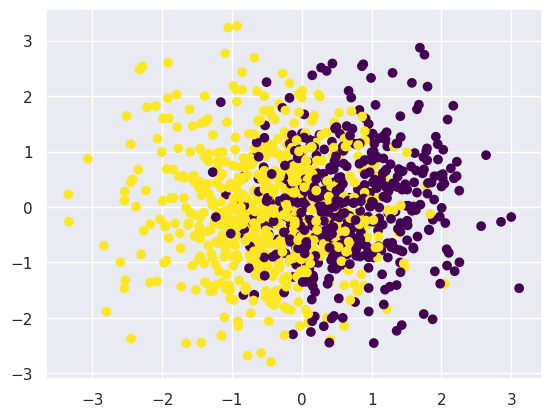

In [ ]:
plt.scatter(X_scal.iloc[:,0], X_scal.iloc[:,1], c=labels_spectral, cmap='viridis')
plt.show()

In short, we failed at finding clear, visual distinctions between data labelled differently. Probably the aim was too pretentious: it is difficult to find 2D or 3D graphical representations of high dimensional data that are able to capture the underlying separation in classes.

# Random forest

In this section I will evaluate and compare the performance of random forest with and without the application of PCA. Therefore, I will test the classifier in the two possible cases. By doing so, I will be able to observe whether PCA proves to be useful to our studies. 

## Without PCA

### Baseline accuracy

We first create a Random Forest Classifier without PCA nor any hyperparameter tuning and see its performance. This will give us a baseline accuracy.

We first try it on the raw data:

In [ ]:
# Initialize classifier
base_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit on training data
base_rf.fit(X_train, y_train)

# Predict on test data
y_pred = base_rf.predict(X_test)

# Print accuracy
print(f'Baseline accuracy: {accuracy_score(y_pred, y_test)}')

Baseline accuracy: 0.9136363636363637


Now, we try it on our rescaled data:

In [ ]:
# Fit on rescaled training data
base_rf.fit(X_train_scal,y_train_scal)

# Predict on rescaled test data
y_pred = base_rf.predict(X_test_scal)

# Print accuracy
print(f'Baseline accuracy: {accuracy_score(y_pred, y_test_scal)}')

Baseline accuracy: 0.8872727272727273


We see that the prediction's performance is pretty much indipendent with respect to the dataset of choice (actually, it gets worst with the rescaled date). Therefore we keep using the original dataset for convenience.

### Random forest parameters

We are now interested in finding the optimal parameters for our random forest classification. To do so, we use Random Search, which is often preferred to Grid Search due to its lower time complexity.

In the whole notebook, during cross validation I will select a number of iterations that is just sufficient to find acceptable models, without letting the code run for too long. This decision represents a tradeoff between the time-complexity and accuracy of the algorithm. Also, note that the parameters evaluated by cross validation have already been heavily narrowed down through several previous searches that have been omitted from the notebook.

In [ ]:
# Define the parameter distributions for random search
param_dist = {
    'max_depth': [None],
    'criterion': ['gini'],
    'n_estimators': [525, 550, 575],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1,2],
    'bootstrap': [True]
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=4, scoring='accuracy', n_iter=15, random_state=42, verbose=2, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the parameters of the best model
best_params = random_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params)

# Train and evaluate the model with the best parameters
nopca_rf = RandomForestClassifier(**best_params, random_state = 42)
nopca_rf.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best parameters:  {'n_estimators': 575, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


RandomForestClassifier(n_estimators=575, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = nopca_rf.predict(X_test)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       114
           1       0.89      0.94      0.92       106

    accuracy                           0.92       220
   macro avg       0.92      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220

Confusion matrix:
 [[102  12]
 [  6 100]]
Accuracy score:  0.9181818181818182


We achieved a similar accuracy to the baseline case.

We now depict the tree of our random forest.

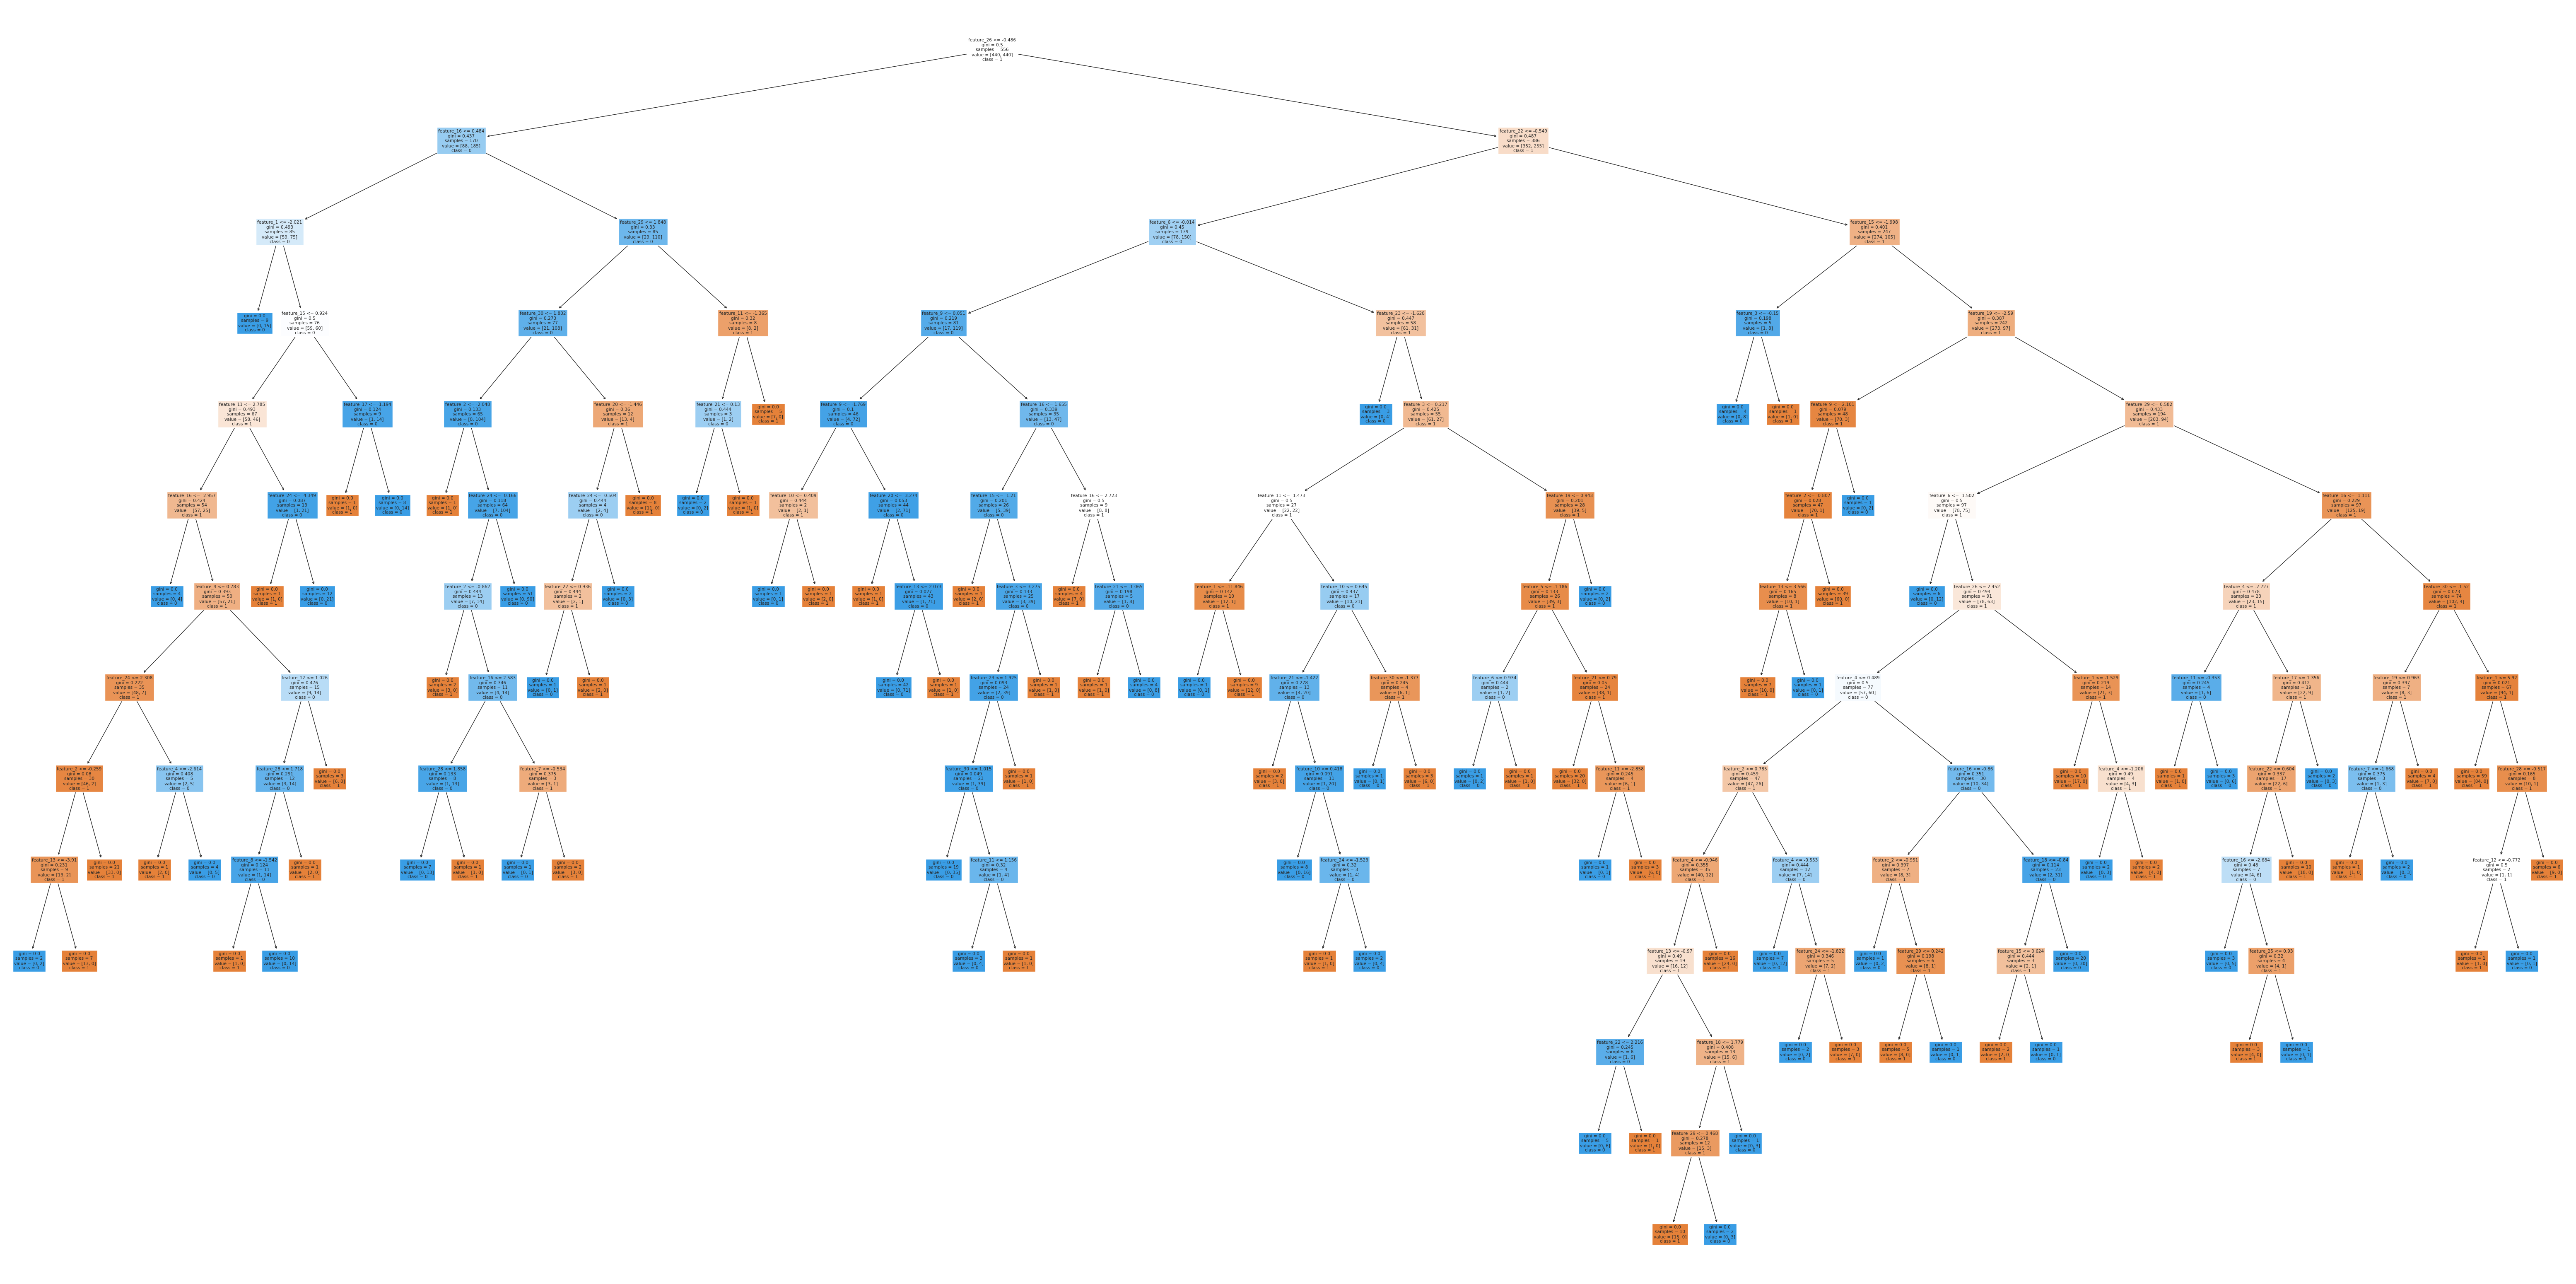

In [ ]:
fig, ax = plt.subplots(figsize=(80,40))
plot_tree(nopca_rf.estimators_[0], feature_names = X_train.columns, class_names=['1', '0'], filled=True, ax=ax)

Let us rank the features of our dataset by relative importance.

In [ ]:
# Get feature importance from the Random Forest model
feature_importances = nopca_rf.feature_importances_

# Get corresponding feature names from the training data
feature_names = X_train.columns

# Create a dictionary that maps feature names to their importance scores
importance_dict = {"Varname": feature_names, "Importance": feature_importances}

# Convert the dictionary to a pandas DataFrame
imp_df = pd.DataFrame(importance_dict)

# Display the DataFrame
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
28,feature_30,0.147045
5,feature_6,0.091088
3,feature_4,0.071733
18,feature_19,0.057151
25,feature_26,0.056825
27,feature_29,0.055307
12,feature_13,0.046430
23,feature_24,0.041076
21,feature_22,0.040604
2,feature_3,0.039601


We see that feature_30 seems to have a higher relative importance compared to other features.

We plot the relative importance of all features in order to have a look at its distribution

Text(0.5, 1.0, 'Feature Importance using Random Forests')

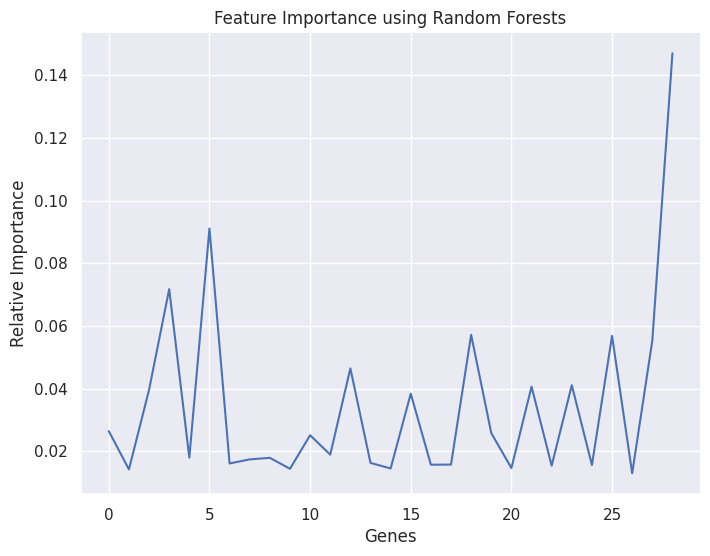

In [ ]:
# Plotting the results of Feature Importance
fig = plt.figure(figsize=(8, 6))
plt.plot(feature_importances)
plt.ylabel('Relative Importance')
plt.xlabel('Genes')
plt.title('Feature Importance using Random Forests')

## With PCA

We have mentioned that there is little evidence supporting the application of PCA in our analysis. However, for the sake of completeness, let's apply it to compare the accuracy of the classifier with and without PCA.

We proceed building a pipeline to find the optimal number of components returned by our PCA before applying the random forest classifier on our data. Once again, the hyperparameters selected for the Random Search have been previously narrowed down outside of this notebook.

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier())])

In [ ]:
param_distributions = {
    'pca__n_components': [5, 10, 15, 20, 25, 28],   
    'rf__n_estimators': [575],          
    'rf__max_features': ['sqrt'], 
    'rf__max_depth' : [None, 1500],               
    'rf__criterion' :['gini'],
    'rf__min_samples_split': [2, 3, 4],
    'rf__min_samples_leaf': [1, 2],
    'rf__bootstrap': [True]
    }

In [ ]:
random_search = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'pca__n_components': [5, 10, 15, 20, 25,
                                                              28],
                                        'rf__bootstrap': [True],
                                        'rf__criterion': ['gini'],
                                        'rf__max_depth': [None, 1500],
                                        'rf__max_features': ['sqrt'],
                                        'rf__min_samples_leaf': [1, 2],
                                        'rf__min_samples_split': [2, 3, 4],
                                        'rf__n_estimators': [575]},
                   random_state=42, verbose=2)

We print the optimal parameters:

In [ ]:
best_params = random_search.best_params_
print(best_params)

{'rf__n_estimators': 575, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 1500, 'rf__criterion': 'gini', 'rf__bootstrap': True, 'pca__n_components': 28}


In [ ]:
best_params_adjusted = {key.replace('rf__', ''): value for key, value in best_params.items() if 'rf__' in key}

# Train and evaluate the model with the best parameters
pca_rf = RandomForestClassifier(**best_params_adjusted, random_state = 42)
pca_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1500, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=575, random_state=42)

Evaluate the model with the best parameters found:

In [ ]:
y_pred = pca_rf.predict(X_test)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       114
           1       0.88      0.94      0.91       106

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

Confusion matrix:
 [[100  14]
 [  6 100]]
Accuracy score:  0.9090909090909091


Check, once again, feature importance in the dataset:

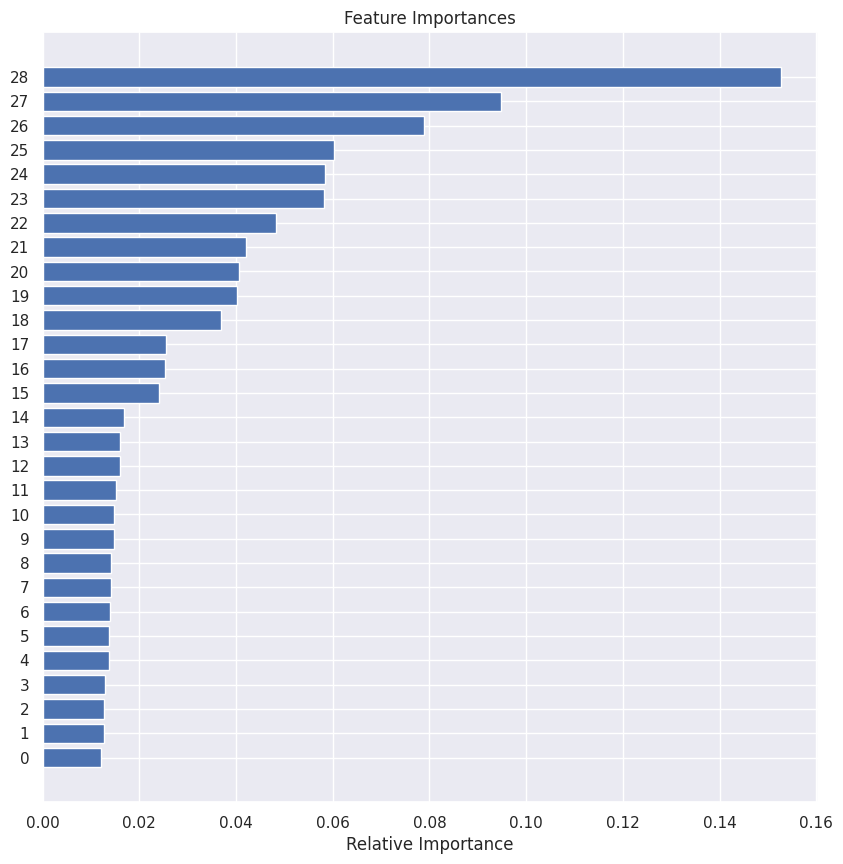

In [ ]:
importances = pca_rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)))
plt.xlabel('Relative Importance')
plt.show()

The random forest following PCA is slightly more inaccurate than the one previously built. As predicted, PCA seems unable to further improve the accuracy of our inquiry. There are various reasons why this happens, but we will talk about it later.

# XGBoost (extra)

A popular alternative classifier to Random Forest is Gradient Boosting: a powerful technique that creates a prediction model in the form of an ensemble of weaker prediction models, typically decision trees.

I am interested to apply this model on my data in order to look for more accurate classifiers. Once again, I will compare its performance both with and without PCA.

## Without PCA

We tune the XGBoost's parameters using a random search. Once again, the hyperparameters have been previously narrowed down outside of the notebook.

In [ ]:
import random
# Tuning hyperparameters and storing model
estimator = XGBClassifier(random_state=42, verbose=3)

# Define the parameter grid
params = {
    'max_depth': randint(10,100),
    'min_child_weight': [1,2],
    'learning_rate': [0.001,0.01, 0.1, 0.5],
    'n_estimators': randint(100,1000),
    'colsample_bynode': [0.1, 0.25, 0.5, 0.75, 1],
    'subsample': [0.5, 0.75, 1]
    }

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=estimator, param_distributions=params, cv=5, scoring='accuracy', verbose=3, n_jobs=-1, n_iter=100)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = random_search.best_score_
print(f"Best score: {best_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[10:34:26] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Best parameters: {'colsample_bynode': 0.75, 'learning_rate': 0.01, 'max_depth': 18, 'min_child_weight': 1, 'n_estimators': 737, 'subsample': 0.75}
Best score: 0.8965909090909092


In [ ]:
# Train and evaluate the model with the best parameters
nopca_xgb = XGBClassifier(**best_params)
nopca_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nopca_xgb.predict(X_test)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       114
           1       0.87      0.94      0.90       106

    accuracy                           0.90       220
   macro avg       0.91      0.91      0.90       220
weighted avg       0.91      0.90      0.90       220

Confusion matrix:
 [[ 99  15]
 [  6 100]]
Accuracy score:  0.9045454545454545


The accuracy gained from XGBoost is very close to that achieved from random forest.

We now focus on plotting the feature importance following the XGBoost.

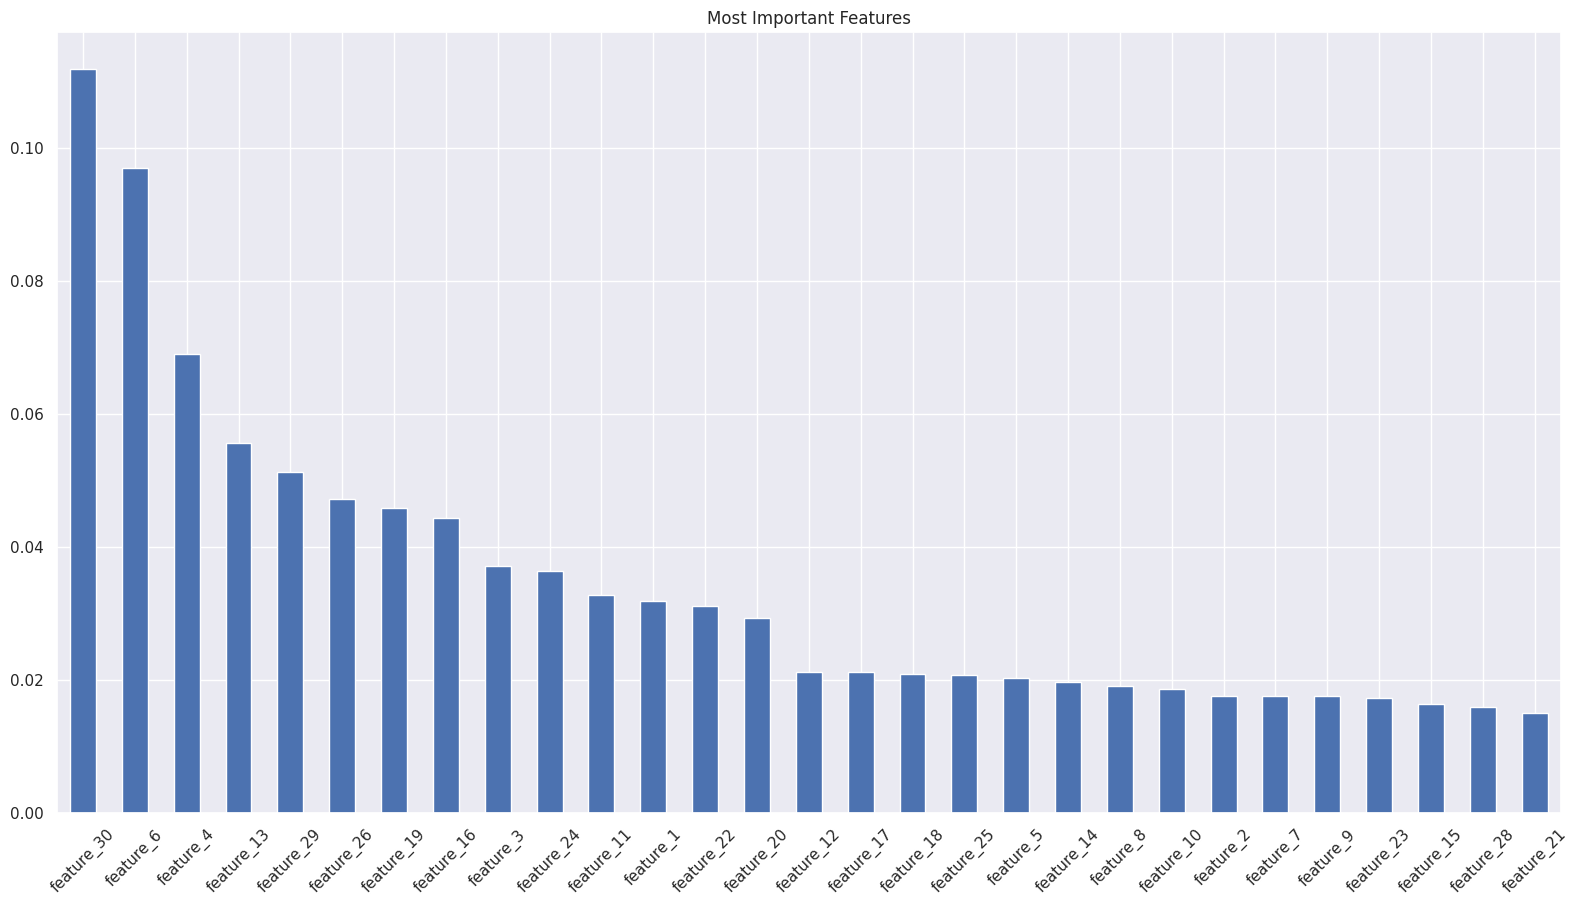

In [ ]:
# Get feature importances
importances = nopca_xgb.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances[:].plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)
plt.tight_layout()
plt.title("Most Important Features")
plt.show()

## With PCA

We repeat the previous steps, but apply PCA first. 

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', XGBClassifier())
])

# Parameter grid for both PCA and XGBClassifier
param_grid = {
    'pca__n_components': [15, 20, 28],
    'clf__n_estimators': [100, 200, 400],  
    'clf__learning_rate': [0.05, 0.002],
    'clf__max_depth': [10,20,50],
    'clf__min_child_weight': [1, 2],
    'clf__colsample_bynode': [0.2, 0.4],
    'clf__subsample': [0.9, 1]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_iter = 100, n_jobs=-1, verbose=3, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = random_search.best_score_
print(f"Best score: {best_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'pca__n_components': 28, 'clf__subsample': 1, 'clf__n_estimators': 400, 'clf__min_child_weight': 1, 'clf__max_depth': 10, 'clf__learning_rate': 0.05, 'clf__colsample_bynode': 0.2}
Best score: 0.8965909090909092


In [ ]:
best_params_adjusted = {key.replace('clf__', ''): value for key, value in best_params.items() if 'clf__' in key}

# Train and evaluate the model with the best parameters
nopca_xgb = XGBClassifier(**best_params_adjusted)
nopca_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nopca_xgb.predict(X_test)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       114
           1       0.86      0.96      0.91       106

    accuracy                           0.90       220
   macro avg       0.91      0.91      0.90       220
weighted avg       0.91      0.90      0.90       220

Confusion matrix:
 [[ 97  17]
 [  4 102]]
Accuracy score:  0.9045454545454545


Check, once again, feature importance in the dataset:

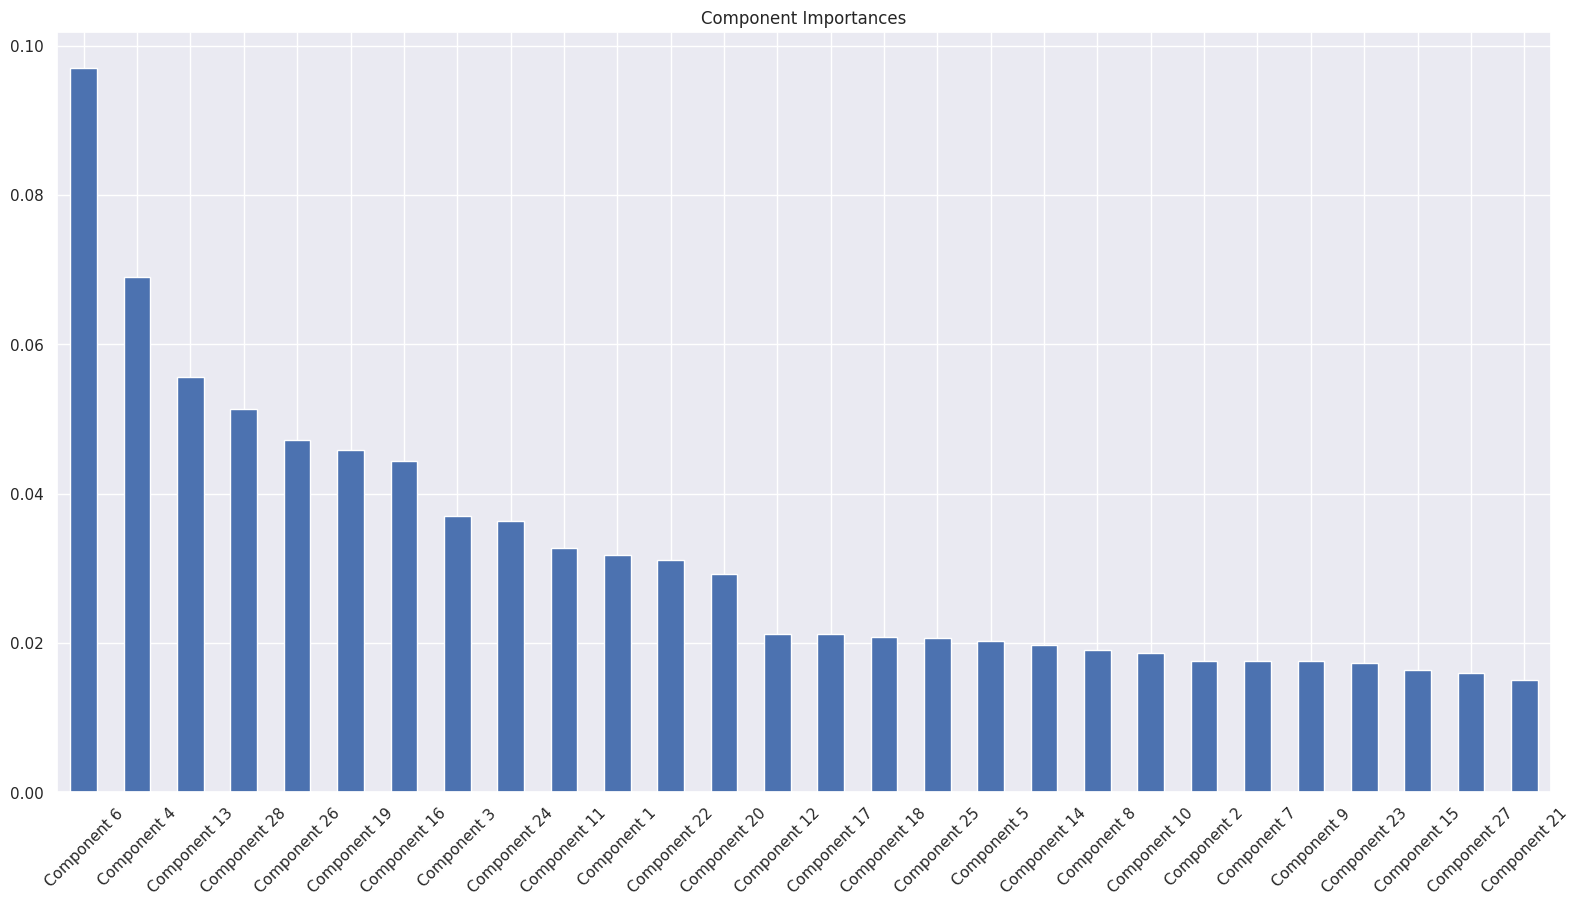

In [ ]:
# Generate component names
component_names = ["Component " + str(i+1) for i in range(best_params['pca__n_components'])]

# Select the importances corresponding to the selected components
importances_selected = importances[:best_params['pca__n_components']]

# Convert the importances into a series with corresponding component names as labels
f_importances = pd.Series(importances_selected, component_names)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar plot from f_importances
f_importances.plot(kind='bar', figsize=(16, 9), rot=45)
plt.tight_layout()
plt.title("Component Importances")
plt.show()

Like before, PCA kept 28 components in the analysis. The accuracy of XGradBoost remained pretty much unvaried.

# Making predictions

After trying different prediction models, we found out that the best performing one was random forest without PCA, with an accuracy of about 92%. Therefore, we will apply this classifier on our test dataset.

In [ ]:
df_valid = pd.read_csv("mldata_0003167526.TEST_FEATURES.csv", engine='python', index_col=0)
df_valid

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,
0,5.169152,-0.422545,-0.166745,-2.160405,-0.541668,1.535590,-0.883458,-0.898003,1.029121,-1.164223,...,0.081774,3.640189,0.126593,-2.753048,0.181393,-2.345920,1.535590,-1.830572,2.396734,1.641938
1,4.372384,2.106584,1.661014,-0.591197,-1.318891,0.440874,-1.890186,-0.539446,1.067210,-0.019939,...,1.605968,1.500657,-0.852812,-2.094574,0.111139,0.483712,0.440874,-0.903571,-0.721683,1.683998
2,-1.414379,-0.496314,0.921714,-1.385249,-0.993750,2.204314,0.827298,-0.483309,-1.317939,-0.584120,...,0.335746,2.644945,-1.005737,-4.504952,-0.374361,0.244277,2.204314,0.080471,0.324959,2.060959
3,-3.978457,-1.320719,-0.725139,-1.897857,1.409653,-1.259921,-0.445250,-2.360164,0.515266,1.181887,...,0.645354,0.205342,-0.312366,-2.892793,-0.650078,4.034582,-1.259921,1.668748,1.222397,1.759645
4,-4.583941,0.093019,0.691001,0.370484,1.765657,3.863709,0.445114,-0.489995,0.325797,1.215284,...,2.014121,-2.584151,0.224861,-0.229516,-0.205261,0.248366,3.863709,-0.664600,-0.351065,2.872313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.644332,0.370689,-4.082042,-2.806278,-0.739130,-0.303571,1.121895,-0.107321,-0.201497,0.054933,...,0.033633,-0.544219,-1.665967,-0.606563,-0.099780,2.368125,-0.303571,-0.605207,1.177338,1.779320
1096,-2.753484,-0.718869,0.166363,0.114012,-1.720009,2.818790,0.858724,-0.262194,-0.627256,-0.456870,...,0.115490,1.839830,-0.399719,-2.354364,0.554073,2.675105,2.818790,0.279674,3.836591,5.181900
1097,-0.657574,-1.834577,-1.073452,-2.571303,0.381434,3.320756,1.413899,0.740743,0.300032,-1.042624,...,0.446898,-1.517231,-0.081561,-1.106731,-0.867004,0.111508,3.320756,-0.365547,1.008189,-1.055714


Once again, we must delete feature 27 from our dataset

In [ ]:
df_valid = df_valid.drop("feature_27", axis=1)

Proceed predicting the data labels.

In [ ]:
y_pred = nopca_rf.predict(df_valid)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

Out of curiosity, check the content of our prediction.

In [ ]:
unique_values, frequencies = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, frequencies):
    print(f"Number: {value}, Frequency: {count}")

Number: 0, Frequency: 548
Number: 1, Frequency: 552


In [ ]:
print(np.array2string(y_pred, threshold=np.inf))

[0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 0 1 1 0 1 1 1 1 0 1 1 1 

In [ ]:
np.savetxt('test_predictions.txt', y_pred, fmt="%.0f")

# Conclusion

To summarize the document, I first loaded the document, separated the data into labels and features, computed an initial EDA and proceeded exploring possible evidences supporting the application of PCA. The correlation heatmap and "Explained Variance vs Number of Principal Components" graphs both hinted that no PCA was needed for the inquiry. Indeed, correlation between features was low in almost all points, and we found no clear elbow point in the "Explained Variance vs Number of Principal Components" diagram. In addition, I found out that 95% of the variance was explained by 25 out of 29 components of the PCA (29, and not 30, since a feature got filtered out during the correlation section). This means that most of our features were essential to understand the structure of our dataset. 

However, out of curiosity, I still decided to apply PCA to the model, to check whether it could slightly improve the performance of a random forest. Without PCA, random forest achieved an accuracy of approximately 92%. This means that the model alone was already pretty precise. When pipelining, the optimal number of components returned for PCA was 28. This means that the dimensionality of the data reduced slightly, suggesting once again the ineffectiveness of PCA over the dataset. The succeeding random forest also provided an accuracy level very close to the previous one, yet slightly lower.

I repeated the same procedures with XGBoost instead of Random Forest, to try and gain a better accuracy in prediction. Yet, I still achieved an accuracy around 90%, both with and without PCA.

As predicted, PCA was not useful during our inquiry: in the optimal case it could only diminsh the dimensionality of the data by one component without impacting on the accuracy of our predictions. The main reason why this occured is that PCA assumes linear relationships between variables, which clearly don't hold.

Since the random forest with no PCA proved to be more accurate than all other models (accuracy 91.8%), it is the prediction algorithm I selected to make predictions on the test dataset.